
## Тема проекта:
### Анализ стоимости медицинских услуг в США на основе личных данных и здоровья



В данном проекте мы исследуем, как различные факторы, такие как возраст, пол, индекс массы тела, наличие детей, курение и регион проживания, влияют на стоимость медицинской страховки.

## Цель проекта:
Выявить ключевые факторы, которые наиболее значимо влияют на стоимость страховых взносов и могут помочь страховым компаниям в моделировании тарифов и максимизации прибыли.

## Источник данных:
Для анализа используется датасет, содержащий информацию о страховых взносах разных людей из США. Данные взяты с платформы [Kaggle]("https://www.kaggle.com/datasets/mirichoi0218/insurance/data").

## В ходе исследования необходимо будет выполнить:
1. Разведочный анализ данных (EDA): оценить качество данных, выявить пропуски, дубликаты и выбросы.

2. Статистический анализ: вычислить описательные статистики и провести визуализацию данных для лучшего понимания распределения признаков.

3. Моделирование: построить модель регрессии для предсказания стоимости страховых взносов на основе доступных факторов.

4. Проверка гипотез: использовать статистические тесты для проверки предположений о зависимостях в данных.

5. Оценка модели: оценить качество построенной модели регрессии и интерпретировать полученные результаты.

## Команда проекта

Проект выполняется группой из трех человек: [Имя 1], [Имя 2], [Имя 3].


___________________________________________________________________________________



Итак, приступим!

Для начала импортируем все необходимые для работы библиотеки(рядом с каждой библиотекой описание для чего она используется в проекте)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Теперь загрузим заренее найденный датасет, чтобы потом с ним было удобно работать

In [3]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)
df.head() # Выводим первые 5 строк нашего датафрейма

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


В датасете представлены данные о страховых взносах различных людей с различными характеристиками. Ниже перечислены признаки, их значения и описание.

• age - Возраст человека.
Целое число, например, 19, 18, 28 и т.д.

• sex - Пол человека.
Категориальная переменная: 'female' (женский) или 'male' (мужской).

• bmi - Индекс массы тела, который дает понимание телосложения человека в зависимости от веса и роста.
Вещественное число, например, 27.9, 33.77 и т.д.

• children - Количество детей в семье.
Целое число, например, 0, 1, 3 и т.д.

• smoker - Информация о курении.
Категориальная переменная: 'yes' (курит) или 'no' (не курит).

• region - Регион проживания человека в США.
Категориальная переменная, например, 'southwest', 'southeast', 'northwest', 'northeast'.

• charges - Медицинские расходы, выставленные страховой компанией.
Вещественное число, например, 16884.924, 1725.5523 и т.д.


<h3>Разведочный Анализ Данных(EDA)

Разведочный анализ данных (Exploratory Data Analysis, EDA) — это один из этапов нашего исследования, который позволяет нам лучше понять характеристики данных, с которыми мы работаем. Наша цель — убедиться, что данные корректны и готовы к анализу и моделированию. В рамках EDA мы выполним следующие задачи:

1. Понимание размера данных:
Определение количества строк и столбцов в датасете.

2. Типы данных:
Определение типа данных каждого признака (например, int, float, object).

3. Классификация данных каждого признака с точки зрения анализа (непрерывные, дискретные, номинальные, порядковые).

4. Обработка пропусков:
Проверка наличия пропусков в данных.
Выбор и реализация метода обработки пропусков для каждого признака, где это необходимо.

5. Анализ выбросов:
Определение наличия выбросов в данных.
Выбор метода для идентификации и обработки выбросов.

6. Описательные статистики:
Расчет основных описательных статистик для каждого признака.

7. Интерпретация статистик:
Подробный анализ и интерпретация описательных статистик для одного числового и одного категориального признака.

 После завершения EDA мы сможем с уверенностью переходить к следующим этапам нашего проекта.

##### 1. Размер данных

In [4]:
row,col = df.shape
print(f"В датасете {row} строк и {col} столбцов")

В датасете 1338 строк и 7 столбцов


##### 2. Типы данных

In [5]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


##### 3. Классификация данных


Данные могут быть разделены на несколько категорий:

• Непрерывные данные: Эти данные могут принимать любое значение внутри диапазона и обычно связаны с измерениями. Примеры включают вес, рост, температуру.

• Дискретные данные: Эти данные принимают только определенные, отдельные значения. Обычно они связаны с счетными процессами, например, количество детей или количество автомобилей в семье.

• Номинальные данные: Это категориальные данные без какого-либо порядка или ранга. Например, пол, национальность, марка автомобиля.

• Порядковые данные: Категориальные данные, которые имеют явный порядок, но между которыми нет равного интервала. Примеры включают образовательный уровень, уровень удовлетворенности.

Итак, с учетом второго и третьего пункта можно классифицировать признаки в нашем датафрейме следующим образом:

1. age:

    • Тип данных: int (целочисленный)

    • Тип данных с точки зрения анализа: Непрерывный


2. sex:

    • Тип данных: object (строковый)

    • Тип данных с точки зрения анализа: Номинальный


3. bmi:

    • Тип данных: float (вещественный)

    • Тип данных с точки зрения анализа: Непрерывный


4. children:

    • Тип данных: int (целочисленный)

    • Тип данных с точки зрения анализа: Дискретный


5. smoker:

    • Тип данных: object (строковый)

    • Тип данных с точки зрения анализа: Номинальный


6. region:

    • Тип данных: object (строковый)

    • Тип данных с точки зрения анализа: Номинальный


7. charges:

    • Тип данных: float (вещественный)
    
    • Тип данных с точки зрения анализа: Непрерывный
    


##### 4. Обработка пропусков

Для начала стоит определить, есть ли пропуски в данных:

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Можно заметить, что количество пропусков в каждом столбце равно 0, поэтому можно говорить о том, что в нашем датфрейме нет пропусков.

Однако, если пропуски в данных все же были обнаружены, то вот какие два метода решения этой проблемы можно предложить:

• Удаление строк:  Если в датасете немного пропущенных значений, можно удалить строки, содержащие пропуски. Это решение подходит, если потеря данных не окажет существенного влияния на анализ.


• Замена средним/медианой/модой: 
Для непрерывных переменных пропуски часто заменяют средним или медианным значением.
Для дискретных и категориальных переменных используют замену модой (самым часто встречающимся значением).

Далее пример кода для устранения пропусков - заменой средним значением для bmi ( так как bmi имеет непрерывный тип данных ) и модой для smoker ( так как smoker имеет номинальный тип данных ):

In [7]:
if df['bmi'].isnull().sum() > 0:
    df['bmi'].fillna(df['bmi'].median(), inplace=True)

if df['smoker'].isnull().sum() > 0:
    smoker_mode = df['smoker'].mode()[0]
    df['smoker'].fillna(smoker_mode, inplace=True)

##### 5. Анализ выбросов

Для начала построим boxplot для непрерывных признаков, чтобы визуально оценить наличие выбросов. Boxplot позволяет увидеть распределение данных и легко выявить потенциальные выбросы. Строить графики мы будем только для непрерывных признаков

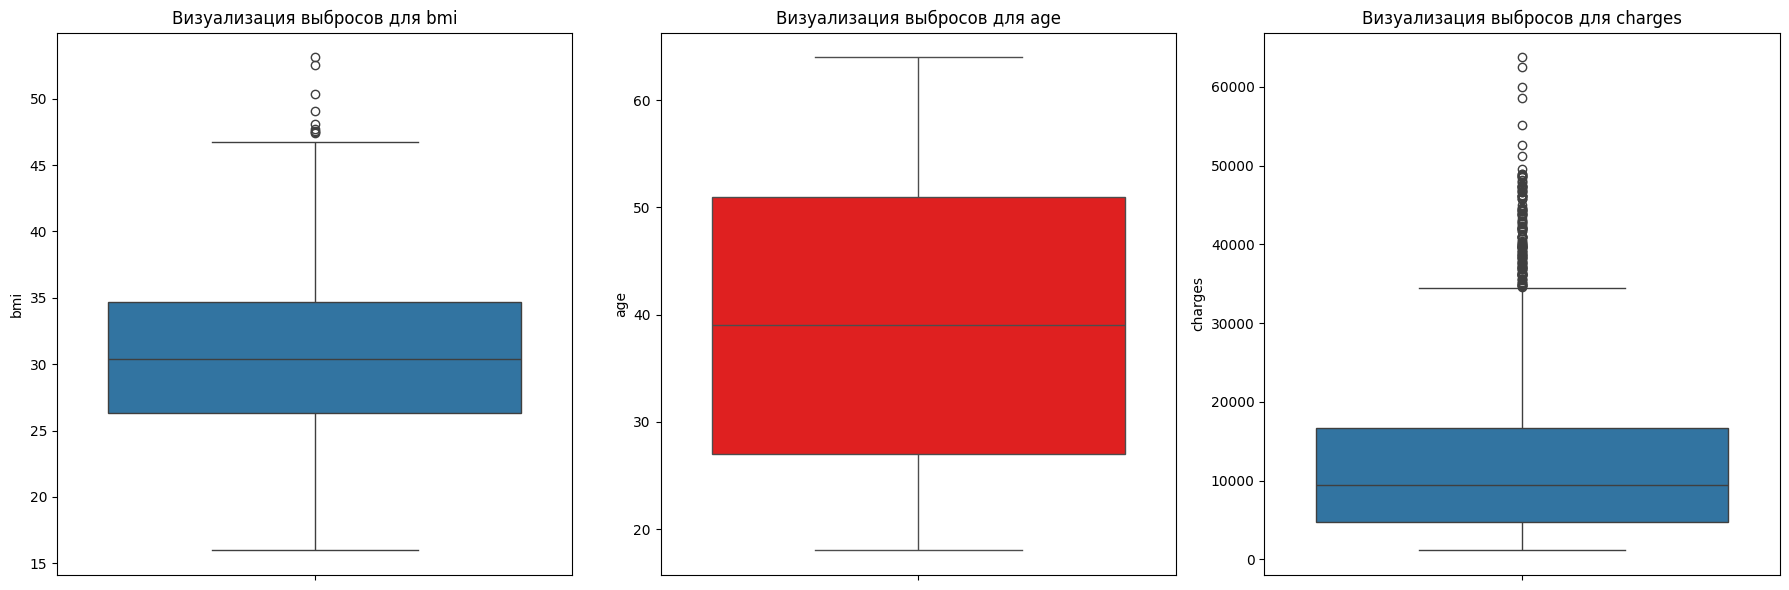

In [8]:
# Построение Boxplot для непрерывных признаков на одной фигуре
plt.figure(figsize=(18, 6))

# Boxplot для bmi
plt.subplot(1, 3, 1)
sns.boxplot(data=df['bmi'])
plt.title('Визуализация выбросов для bmi')

# Boxplot для age
plt.subplot(1, 3, 2)
sns.boxplot(data=df['age'], color="red")
plt.title('Визуализация выбросов для age')

# Boxplot для charges
plt.subplot(1, 3, 3)
sns.boxplot(data=df['charges'])
plt.title('Визуализация выбросов для charges')

plt.tight_layout()
plt.show()

Какаие выводы можно сделать?

• **<i>BMI</i>**:  В данных присутствуют несколько выбросов с высокими значениями индекса массы тела, превышающими 45.
Большинство данных находится в диапазоне от 25 до 35, что соответствует нормальному и избыточному весу.
Выбросы могут свидетельствовать о наличии людей с ожирением в выборке.

• **<i>Age</i>**:  В данных нет явных выбросов для возраста. Все значения находятся в пределах нормального диапазона.
Возрастная группа варьируется от примерно 20 до 64 лет.
Это указывает на то, что возрастной диапазон респондентов относительно однороден и нет экстремальных значений.

• **<i>Charges</i>**:  Присутствует значительное количество выбросов с высокими значениями медицинских расходов, превышающими 40,000.
Основная масса данных сосредоточена в диапазоне от 1,000 до 20,000.
Выбросы могут быть обусловлены индивидуальными случаями с высокими медицинскими затратами, возможно, из-за серьезных заболеваний или интенсивного медицинского обслуживания.

Выбросы в признаках **<i>BMI</i>** и **<i>Charges</i>** могут значительно повлиять на результаты анализа и моделирования. Поэтому следует обработать выбросы. 


##### <br>Определение выбросов с использованием IQR<br>

Интерквартильный размах (IQR) — это статистическая мера, используемая для определения разброса данных. IQR представляет собой разницу между третьим квартилем (Q3) и первым квартилем (Q1) данных. Выбросами считаются значения, которые находятся за пределами 1.5 * IQR ниже первого квартиля или выше третьего квартиля.

In [9]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < low) | (df[column] > upper)]

for_age = outliers(df, 'age')
for_bmi = outliers(df, 'bmi')
for_charges = outliers(df, 'charges')

print(f'Выбросы в age:\n{for_age}\n')
print(f'Выбросы в bmi:\n{for_bmi}\n')
print(f'Выбросы в charges:\n{for_charges}\n')

Выбросы в age:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

Выбросы в bmi:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270

Выбросы в charges:
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23

Выводы интерквантильного размаха:

• **<i>Age</i>**:  В данных отсутствуют выбросы для признака age. Это подтверждает ранее сделанные выводы, что возрастные данные однородны и находятся в допустимом диапазоне.


• **<i>BMI</i>**:  Обнаружены несколько выбросов, связанных с высокими значениями индекса массы тела (например, значения выше 45).
Примеры включают индексы массы тела до 53.13, что значительно превышает нормальный диапазон.
Эти выбросы могут указывать на наличие людей с тяжелым ожирением в выборке, что требует дальнейшего анализа для оценки их влияния на общий результат.


• **<i>Charges</i>**:   Обнаружено значительное количество выбросов, связанных с высокими медицинскими расходами (например, значения выше 35,000).
Такие высокие значения могут быть связаны с индивидуальными случаями серьезных заболеваний или интенсивного медицинского обслуживания.

##### Удаление выбросов


Для удаления выбросов мы также можем использовать интерквартильный размах. Будем удалять значения, которые выходят за пределы диапазона, определенного следующим образом: значения меньше \(Q1 - 1.5 * IQR\) или больше \(Q3 + 1.5 * IQR\).


In [10]:
def delete_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= low) & (df[column] <= upper)]

df_cleaned = df.copy()
df_cleaned = delete_outliers(df_cleaned, 'age')
df_cleaned = delete_outliers(df_cleaned, 'bmi')
df_cleaned = delete_outliers(df_cleaned, 'charges')

print(f'Размер данных после удаления выбросов: {df_cleaned.shape}')

Размер данных после удаления выбросов: (1191, 7)


##### 5. Описательные статистики

Для начала посчитаем описательные статистики для всех переменных в нашем датасете.



In [11]:
# Описательные статистики для числовых переменных
numerical_stats = df_cleaned.describe()
print(numerical_stats)
print()

# Описательные статистики для категориальных переменных
categorical_stats = df_cleaned.describe(include=['object'])
print(categorical_stats)

               age          bmi     children       charges
count  1191.000000  1191.000000  1191.000000   1191.000000
mean     39.010915    29.993648     1.087322   9901.104142
std      14.056634     5.870584     1.216455   7187.379901
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    25.800000     0.000000   4408.695900
50%      39.000000    29.700000     1.000000   8347.164300
75%      51.000000    33.770000     2.000000  12953.594600
max      64.000000    46.750000     5.000000  34303.167200

           sex smoker     region
count     1191   1191       1191
unique       2      2          4
top     female     no  northwest
freq       610   1055        305


##### Интерпретация описательных статистик

##### Числовой признак: `charges`

Описательные статистики для медицинских расходов (`charges`):

- **count**: Количество наблюдений (1191). Это число уменьшилось по сравнению с исходными данными из-за удаления выбросов.
- **mean**: Среднее значение медицинских расходов составляет примерно 9,901.10.
- **std**: Стандартное отклонение (7,187.38) указывает на значительное рассеяние значений вокруг среднего.
- **min**: Минимальное значение медицинских расходов составляет 1,121.87.
- **25%**: Нижний квартиль (Q1) равен 4,408.70, что означает, что 25% значений находятся ниже этой отметки.
- **50% (median)**: Медианное значение равно 8,347.16, что разделяет данные пополам.
- **75%**: Верхний квартиль (Q3) составляет 12,953.59, что означает, что 75% значений находятся ниже этой отметки.
- **max**: Максимальное значение медицинских расходов составляет 34,303.17.

Интерпретация:
Средние медицинские расходы достаточно высоки, с существенным рассеянием значений. Большой разброс может быть обусловлен индивидуальными случаями высоких медицинских затрат, что подтверждается большим стандартным отклонением и широким диапазоном значений.

##### Категориальный признак: `smoker`

Описательные статистики для признака `smoker`:

- **count**: Количество наблюдений (1191).
- **unique**: Количество уникальных значений (2), что соответствует "yes" и "no".
- **top**: Самое частое значение (no).
- **freq**: Частота самого частого значения (1055).

Интерпретация:
Большинство людей в нашем датасете не курят (1055 из 1191). Это может быть важным фактором при анализе медицинских расходов, так как курение часто связано с повышенными медицинскими расходами.


<h3>Визуализация данных



Построим не менее трех графиков, используя различные типы визуализаций.


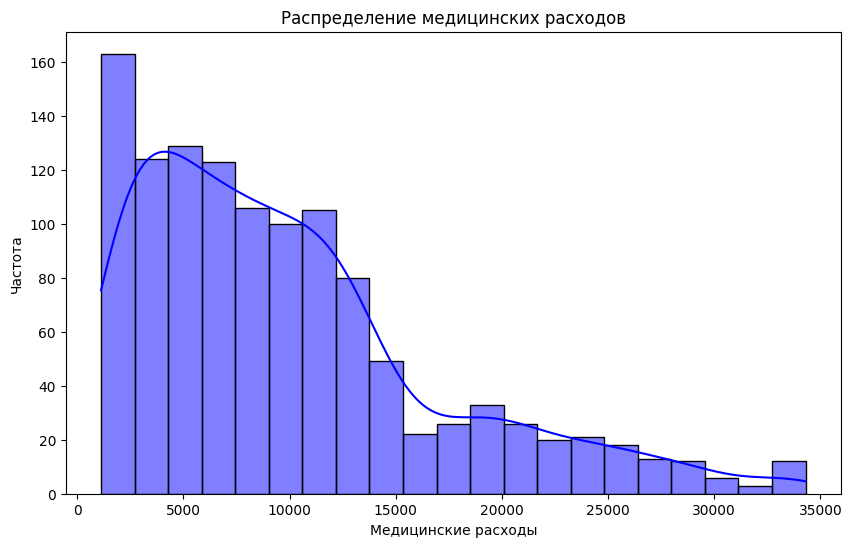

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма распределения медицинских расходов
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['charges'], kde=True, color='blue')
plt.title('Распределение медицинских расходов')
plt.xlabel('Медицинские расходы')
plt.ylabel('Частота')
plt.show()


**Вывод**:
Гистограмма показывает, что большинство медицинских расходов находятся в диапазоне от 1,000 до 15,000, с длинным хвостом на правой стороне, указывающим на несколько случаев с очень высокими расходами. Это подтверждает ранее замеченное большое стандартное отклонение и наличие выбросов. Распределение не является нормальным из-за асимметрии вправо.


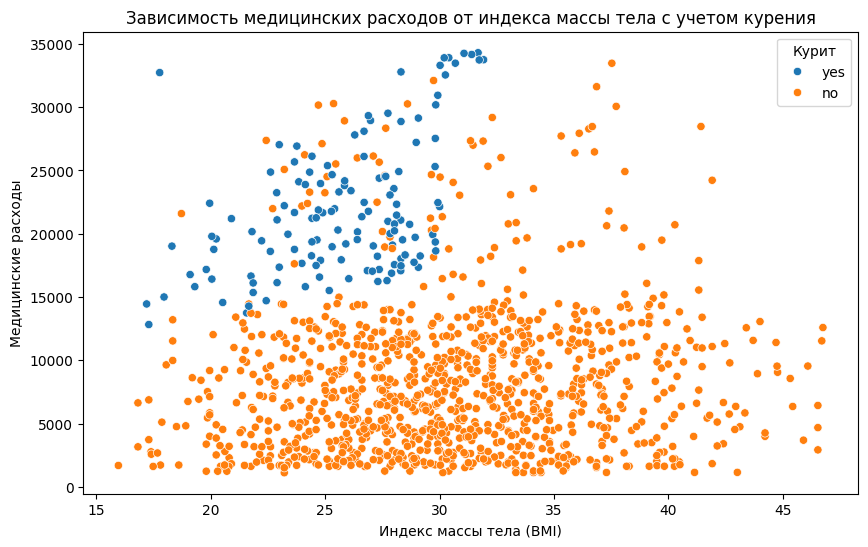

In [13]:
# Scatter plot зависимости медицинских расходов от индекса массы тела с разделением по курению
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df_cleaned)
plt.title('Зависимость медицинских расходов от индекса массы тела с учетом курения')
plt.xlabel('Индекс массы тела (BMI)')
plt.ylabel('Медицинские расходы')
plt.legend(title='Курит')
plt.show()


**Вывод**:
Точечный график показывает, что курящие люди (обозначены другим цветом) в среднем имеют более высокие медицинские расходы по сравнению с некурящими, особенно при высоком индексе массы тела. Это указывает на возможное влияние курения на увеличение медицинских затрат. Мы также видим, что, несмотря на общий тренд, есть разброс значений, что может указывать на другие важные факторы, влияющие на расходы.


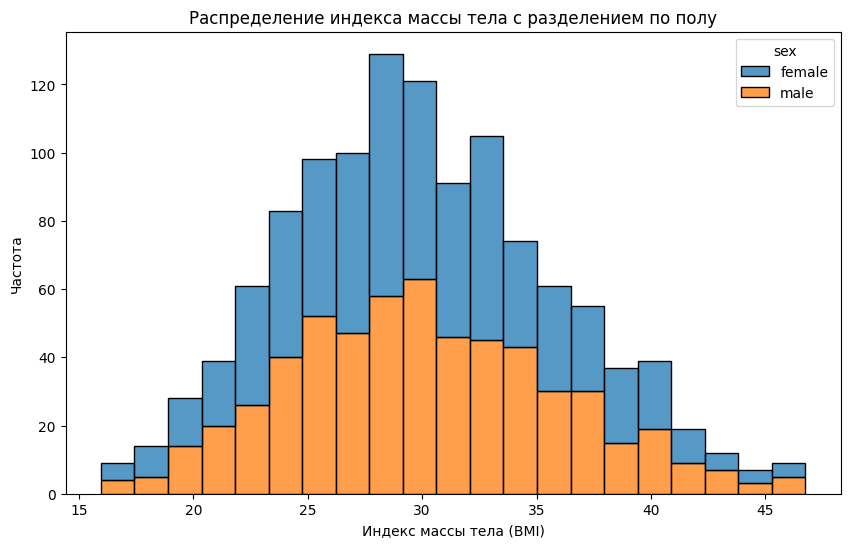

In [14]:
# Гистограмма распределения индекса массы тела с разделением по полу
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='bmi', hue='sex', multiple='stack')
plt.title('Распределение индекса массы тела с разделением по полу')
plt.xlabel('Индекс массы тела (BMI)')
plt.ylabel('Частота')
plt.show()


**Вывод**:
Гистограмма показывает, что распределение индекса массы тела у мужчин и женщин схоже, с пиком в диапазоне от 25 до 35, что соответствует нормальному распределению. Однако у женщин наблюдается больший вклад в группы с более низким BMI (от 15 до 25), в то время как мужчины чаще встречаются в диапазонах от 30 до 45. Это указывает на небольшие различия в распределении BMI между полами, но в целом данные имеют нормальное распределение с центральным пиком.


<h3>Корреляционный анализ



Построим матрицу корреляций по количественным переменным и визуализируем ее с помощью тепловой карты.


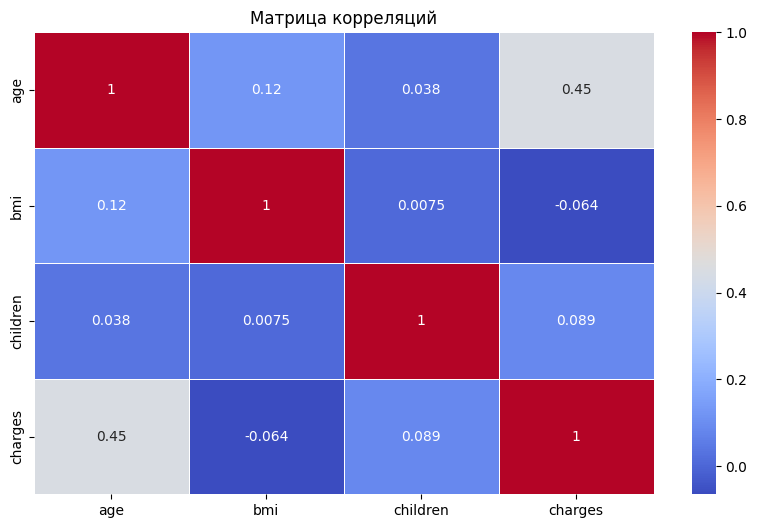

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение матрицы корреляций
corr_matrix = df_cleaned[['age', 'bmi', 'children', 'charges']].corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляций')
plt.show()


#### Описание зависимостей

1. **Age (Возраст)**:
   - **Корреляция с charges (медицинские расходы)**: Положительная корреляция (0.45). Это указывает на то, что с увеличением возраста увеличиваются медицинские расходы. Это логично, так как пожилые люди, как правило, имеют больше медицинских проблем и, соответственно, тратят больше на медицинские услуги.
   - **Корреляция с bmi (индекс массы тела)**: Низкая положительная корреляция (0.12), что указывает на слабую связь между возрастом и индексом массы тела в данном наборе данных.
   - **Корреляция с children (количество детей)**: Очень низкая положительная корреляция (0.038), что указывает на практически отсутствие связи между возрастом и количеством детей.

2. **BMI (Индекс массы тела)**:
   - **Корреляция с charges (медицинские расходы)**: Отрицательная слабая корреляция (-0.064). Это указывает на то, что с увеличением индекса массы тела медицинские расходы имеют слабую тенденцию к уменьшению, но эта связь очень незначительная и, вероятно, может быть случайной.
   - **Корреляция с children (количество детей)**: Очень низкая положительная корреляция (0.0075), что указывает на практически отсутствие связи между индексом массы тела и количеством детей.

3. **Children (Количество детей)**:
   - **Корреляция с charges (медицинские расходы)**: Низкая положительная корреляция (0.089). Это указывает на слабую связь, что с увеличением количества детей могут увеличиваться медицинские расходы, но связь незначительная.
   - **Корреляция с другими переменными**: Низкая корреляция с возрастом и индексом массы тела, что указывает на слабую связь между этими переменными.

### Общие выводы

- Наиболее заметная корреляция наблюдается между возрастом и медицинскими расходами (0.45), что подтверждает общее понимание того, что с возрастом расходы на медицину растут.
- Остальные корреляции между переменными достаточно низкие, указывая на слабые или несущественные связи.


<h3>Тестирование гипотез




#### Гипотеза 1: Сравнение средних медицинских расходов для двух групп

H0: Средние медицинские расходы (charges) для людей старше 40 такие же, как и у людей младше 40.  
H1: Средние медицинские расходы (charges) для людей старше 40 больше, чем у людей младше 40.


In [20]:
import numpy as np
from scipy.stats import ttest_ind

# Отбор данных для людей с age > 40 и age <= 40
old_charges = df_cleaned[df_cleaned['age'] > 40]['charges']
young_charges= df_cleaned[df_cleaned['age'] <= 40]['charges']

# Проведение t-теста для независимых выборок
t_stat, p_value = ttest_ind(old_charges, young_charges, equal_var=False, alternative='greater')

print(f'T-статистика: {t_stat}')
print(f'P-значение: {p_value}')

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: Средние медицинские расходы (charges) для людей старше 40 больше, чем у людей младше 40.")
else:
    print("Средние медицинские расходы (charges) для людей старше 40 такие же, как и у людей младше 40.")


T-статистика: 15.182044886957572
P-значение: 5.166352530157155e-48
Отвергаем нулевую гипотезу: Средние медицинские расходы (charges) для людей старше 40 больше, чем у людей младше 40.


#### Гипотеза 2: Сравнение средних медицинских расходов для курящих и некурящих людей


H0: Средние медицинские расходы (charges) для курящих людей такие же, как и для некурящих.  
H1: Средние медицинские расходы (charges) для курящих людей отличаются от некурящих.


In [24]:
import numpy as np
from scipy.stats import norm

# Отбор данных для курящих и некурящих
smokers_charges = df_cleaned[df_cleaned['smoker'] == 'yes']['charges']
non_smokers_charges = df_cleaned[df_cleaned['smoker'] == 'no']['charges']

# Расчет средних и стандартных отклонений
mean_smokers_charges = np.mean(smokers_charges)
std_smokers_charges = np.std(smokers_charges, ddof=1)

mean_non_smokers_charges = np.mean(non_smokers_charges)
std_non_smokers_charges = np.std(non_smokers_charges, ddof=1)

# Размеры выборок
n_smokers = len(smokers_charges)
n_non_smokers = len(non_smokers_charges)

# Поскольку дисперсия выборок равна дисперсии генеральной совокупности,
# используем формулу для z-теста для двух независимых выборок

# Расчет стандартной ошибки
se = np.sqrt((std_smokers_charges**2 / n_smokers) + (std_non_smokers_charges**2 / n_non_smokers))

# Расчет z-статистики
z_stat = (mean_smokers_charges - mean_non_smokers_charges) / se

# Расчет p-значения
p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))

print(f'Z-статистика: {z_stat:.5f}')
print(f'P-значение: {p_value:.5e}')

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: Средние медицинские расходы для курящих людей отличаются от некурящих.")
else:
    print("Не можем отвергнуть нулевую гипотезу: Средние медицинские расходы для курящих людей такие же, как и для некурящих.")


Z-статистика: 27.36772
P-значение: 0.00000e+00
Отвергаем нулевую гипотезу: Средние медицинские расходы для курящих людей отличаются от некурящих.


#### Гипотеза 3: Тест на независимость критериев (хи-квадрат)

H0: Курение (smoker) и пол (sex) независимы.

H1: Курение (smoker) и пол (sex) зависимы.

In [18]:
from scipy.stats import chi2_contingency

# Создание таблицы сопряженности
contingency_table = pd.crosstab(df_cleaned['sex'], df_cleaned['smoker'])

# Проведение теста хи-квадрат
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Хи-квадрат: {chi2}')
print(f'P-значение: {p_value}')
print(f'Степени свободы: {dof}')
print(f'Ожидаемые значения:\n {expected}')

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: Курение и пол зависимы.")
else:
    print("Не можем отвергнуть нулевую гипотезу: Курение и пол независимы.")


Хи-квадрат: 0.15439574613582768
P-значение: 0.6943695278838905
Степени свободы: 1
Ожидаемые значения:
 [[540.34424853  69.65575147]
 [514.65575147  66.34424853]]
Не можем отвергнуть нулевую гипотезу: Курение и пол независимы.
